# Preprocessing Berita, Summarization & Modeling With Graph Cosine Similirity and Closeness Centrality


##Import Modul

In [161]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fungsi dari modul-modul diatas, antara lain adalah untuk :
- Mendefinisikan fungsi untuk membersihkan dan memproses data teks: Fungsi-fungsi ini menghapus karakter yang tidak relevan, mengubah teks menjadi huruf kecil, dan menghapus kata-kata berhenti (kata-kata umum yang tidak menambah banyak makna pada sebuah kalimat).

- Membuat vektorizer TF-IDF: Vektorizer ini mengubah dokumen teks menjadi vektor numerik yang mewakili frekuensi setiap istilah dalam dokumen.

- Melatih dan mengevaluasi model pembelajaran mesin: Kode ini melatih pengklasifikasi Bayes yang naif dan pengklasifikasi SVM pada vektor TF-IDF dari data pelatihan dan mengevaluasi kinerjanya pada data pengujian menggunakan metrik seperti akurasi, presisi, perolehan, dan skor F1 .

- Memvisualisasikan hasilnya: Kode menggunakan networkx untuk membuat grafik yang mewakili hubungan antar dokumen dan menggunakan seaborn untuk membuat peta panas yang menunjukkan kesamaan kosinus antar dokumen.

## EDU

In [162]:
edu = pd.read_csv('/content/drive/MyDrive/PPW/Tugas/Data Berita Detik EDU.csv')
edu

,Judul,Tanggal,Artikel,Category
0,Pengertian Konsep Diferensiasi Area Geografi d...,"Rabu, 29 Nov 2023 22:00 WIB",Gejala dan permasalahan geografi di setiap dae...,Edu
1,Mahasiswa FT UI Juara 1 Balap Mobil Nasional d...,"Rabu, 29 Nov 2023 21:30 WIB",Berprestasi tak harus di bidang akademik. Sepe...,Edu
2,Keren! Robot Tangan Ini Mirip Seperti Organ Ma...,"Rabu, 29 Nov 2023 21:00 WIB",Ilmuwan telah memanfaatkan printing 3D untuk m...,Edu
3,Mengapa Makam Mesir Kuno Ini Diberi Mantra Pel...,"Rabu, 29 Nov 2023 20:00 WIB","Selama penggalian di Abusir, antara Giza dan S...",Edu
4,"Cara Menyelamatkan Diri Saat Kapal Tenggelam, ...","Rabu, 29 Nov 2023 19:45 WIB","Ketika sedang berada di kapal di laut, tentuny...",Edu
...,...,...,...,...
900,"Cerita Sunar Sanggita, Perusahaan Musik dengan...","Rabu, 01 Nov 2023 11:32 WIB",Sunar Sanggita adalah jasa privat musik modern...,Edu
901,Aturan Linearitas Bidang Studi di PPG Prajabat...,"Rabu, 01 Nov 2023 11:00 WIB",Pendaftaran Program Pendidikan Profesi Guru (P...,Edu
902,Begini Hasil Rekonstruksi Wajah Mumi Perempuan...,"Rabu, 01 Nov 2023 10:30 WIB",Juanita atau Perempuan Es Inca adalah julukan ...,Edu
903,"UGM Bakal Larang Dosen 'Killer' di Kampus, Atu...","Rabu, 01 Nov 2023 10:00 WIB",Universitas Gadjah Mada (UGM) tengah menyusun ...,Edu


In [163]:
sport = pd.read_csv('/content/drive/MyDrive/PPW/Tugas/Data Berita Detik SPORT (2).csv')
sport

,Judul,Tanggal,Artikel,Category
0,"Marquez ke Ducati, Pabrikan Lain Pasti Cemberut","Rabu, 29 Nov 2023 20:10 WIB",Marc Marquez gabung Ducati usai pindah ke Gres...,Sport
1,Honda Tak Kaget Marc Marquez Melesat dengan Mo...,"Rabu, 29 Nov 2023 19:25 WIB",Marc Marquez langsung melesat bersama Gresini ...,Sport
2,Kondisi Terkini Cedera Apriyani Rahayu Jelang ...,"Rabu, 29 Nov 2023 18:55 WIB",Apriyani Rahayu mengungkapkan kondisi terkini ...,Sport
3,Makna Senyum Merekah Marquez Usai Tunggangi Mo...,"Rabu, 29 Nov 2023 18:25 WIB",Marc Marquez tersenyum usai menunggangi motor ...,Sport
4,Jawaban Bagas/Fikri Disindir World Tour Finals...,"Rabu, 29 Nov 2023 17:45 WIB",Bagas Maulana/Muhammad Shohibul Fikri tak ingi...,Sport
...,...,...,...,...
813,5 Bintang Sepakbola Top Dunia Ini Ternyata Dul...,"Rabu, 11 Okt 2023 16:30 WIB",Banyak pemain sepakbola top dunia ternyata men...,Sport
814,Ducati Enggak Takut Rahasianya Akan Dibawa Mar...,"Rabu, 11 Okt 2023 15:50 WIB",Marc Marquez diyakini akan menyeberang ke Gres...,Sport
815,16 Poin Evaluasi PBSI Usai Gagal di Asian Game...,"Rabu, 11 Okt 2023 14:10 WIB",PP PBSI melakukan evaluasi menyusul kegagalan ...,Sport
816,Penggemar Ducati Indonesia Antusias Jumpa Bagn...,"Rabu, 11 Okt 2023 13:19 WIB",Ketua MPR RI sekaligus Ketua Umum Ikatan Motor...,Sport


In [164]:
hasil1 = pd.DataFrame(edu, columns=['Judul', 'Artikel', 'Category'])
hasil2 = pd.DataFrame(sport, columns=['Judul', 'Artikel', 'Category'])

In [165]:
combined_df = pd.concat([hasil1, hasil2]).reset_index(drop=True)
combined_df

,Judul,Artikel,Category
0,Pengertian Konsep Diferensiasi Area Geografi d...,Gejala dan permasalahan geografi di setiap dae...,Edu
1,Mahasiswa FT UI Juara 1 Balap Mobil Nasional d...,Berprestasi tak harus di bidang akademik. Sepe...,Edu
2,Keren! Robot Tangan Ini Mirip Seperti Organ Ma...,Ilmuwan telah memanfaatkan printing 3D untuk m...,Edu
3,Mengapa Makam Mesir Kuno Ini Diberi Mantra Pel...,"Selama penggalian di Abusir, antara Giza dan S...",Edu
4,"Cara Menyelamatkan Diri Saat Kapal Tenggelam, ...","Ketika sedang berada di kapal di laut, tentuny...",Edu
...,...,...,...
1718,5 Bintang Sepakbola Top Dunia Ini Ternyata Dul...,Banyak pemain sepakbola top dunia ternyata men...,Sport
1719,Ducati Enggak Takut Rahasianya Akan Dibawa Mar...,Marc Marquez diyakini akan menyeberang ke Gres...,Sport
1720,16 Poin Evaluasi PBSI Usai Gagal di Asian Game...,PP PBSI melakukan evaluasi menyusul kegagalan ...,Sport
1721,Penggemar Ducati Indonesia Antusias Jumpa Bagn...,Ketua MPR RI sekaligus Ketua Umum Ikatan Motor...,Sport


In [166]:
combined_df.to_csv('processing_DataDetik.csv')

## Membersihkan Data

In [167]:
combined_df.isnull().sum()

Judul       0
Artikel     0
Category    0
dtype: int64

In [168]:
combined_df = combined_df.dropna()
combined_df.isnull().sum()

Judul       0
Artikel     0
Category    0
dtype: int64

In [169]:
combined_df.shape

(1723, 3)

## Menghapus Karakter Yang Tidak Perlu

In [170]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip()
  return text

combined_df['Cleaning'] = combined_df['Artikel'].apply(cleaning)
combined_df['Cleaning']

0       Gejala dan permasalahan geografi di setiap dae...
1       Berprestasi tak harus di bidang akademik. Sepe...
2       Ilmuwan telah memanfaatkan printing 3D untuk m...
3       Selama penggalian di Abusir, antara Giza dan S...
4       Ketika sedang berada di kapal di laut, tentuny...
                              ...                        
1718    Banyak pemain sepakbola top dunia ternyata men...
1719    Marc Marquez diyakini akan menyeberang ke Gres...
1720    PP PBSI melakukan evaluasi menyusul kegagalan ...
1721    Ketua MPR RI sekaligus Ketua Umum Ikatan Motor...
1722    Miguel Oliveira dilaporkan menjadi kandidat pe...
Name: Cleaning, Length: 1723, dtype: object

## Tokenizing

In [171]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

combined_df['Tokenizing'] = combined_df['Cleaning'].apply(tokenizer)
combined_df['Tokenizing']

0       [gejala dan permasalahan geografi di setiap da...
1       [berprestasi tak harus di bidang akademik., se...
2       [ilmuwan telah memanfaatkan printing 3d untuk ...
3       [selama penggalian di abusir, antara giza dan ...
4       [ketika sedang berada di kapal di laut, tentun...
                              ...                        
1718    [banyak pemain sepakbola top dunia ternyata me...
1719    [marc marquez diyakini akan menyeberang ke gre...
1720    [pp pbsi melakukan evaluasi menyusul kegagalan...
1721    [ketua mpr ri sekaligus ketua umum ikatan moto...
1722    [miguel oliveira dilaporkan menjadi kandidat p...
Name: Tokenizing, Length: 1723, dtype: object

## Graph Cosine Similarity

In [172]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

## Plot Graph

In [173]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

## Ringkasan

In [174]:
def summarization(x, k = 4, index=1, threshold=0.11, show_centrality=False):
  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

In [175]:
summary, G = summarization(combined_df["Tokenizing"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.2)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.07142857142857142, 12: 0.07142857142857142, 3: 0.07142857142857142, 4: 0.07142857142857142, 7: 0.22857142857142856, 9: 0.14285714285714285, 10: 0.14285714285714285, 23: 0.19047619047619047, 8: 0.12698412698412698, 11: 0.10714285714285714, 22: 0.1607142857142857, 15: 0.10714285714285714, 17: 0.1607142857142857, 19: 0.07142857142857142, 20: 0.07142857142857142}


In [176]:
summary

'konsep diferensiasi area mengemukakan bahwa fenomena yang ada di muka bumi memiliki perbedaan dan ciri khas masingmasing dikutip dari buku explore geografi jilid 1 untuk smama kelas x karya dra sri wiyanti, mpd dkk., konsep diferensiasi area berhubungan dengan perbedaan fenomena yang terjadi di setiap wilayah. itulah penjelasan tentang konsep diferensiasi area yang menekankan adanya perbedaan karakteristik di setiap wilayah. 8. perbedaan topografi dan relief antar wilayah menimbulkan kenampakan alam yang berbedabeda seperti pegunungan, lembah, atau dataran rendah sehingga menciptakan perbedaan distribusi sumber daya alam. 3. jenis tanaman yang dibudidayakan di dataran tinggi akan berbeda dengan jenis di dataran rendah, seperti teh yang cocok di dataran tinggi dan jagung di dataran rendah. mengutip dari emodul pembelajaran sma geografi kelas x karya fitri sekar lestari, diferensiasi area adalah konsep yang membandingkan dua wilayah untuk menunjukkan karakteristik khasnya masingmasing.'

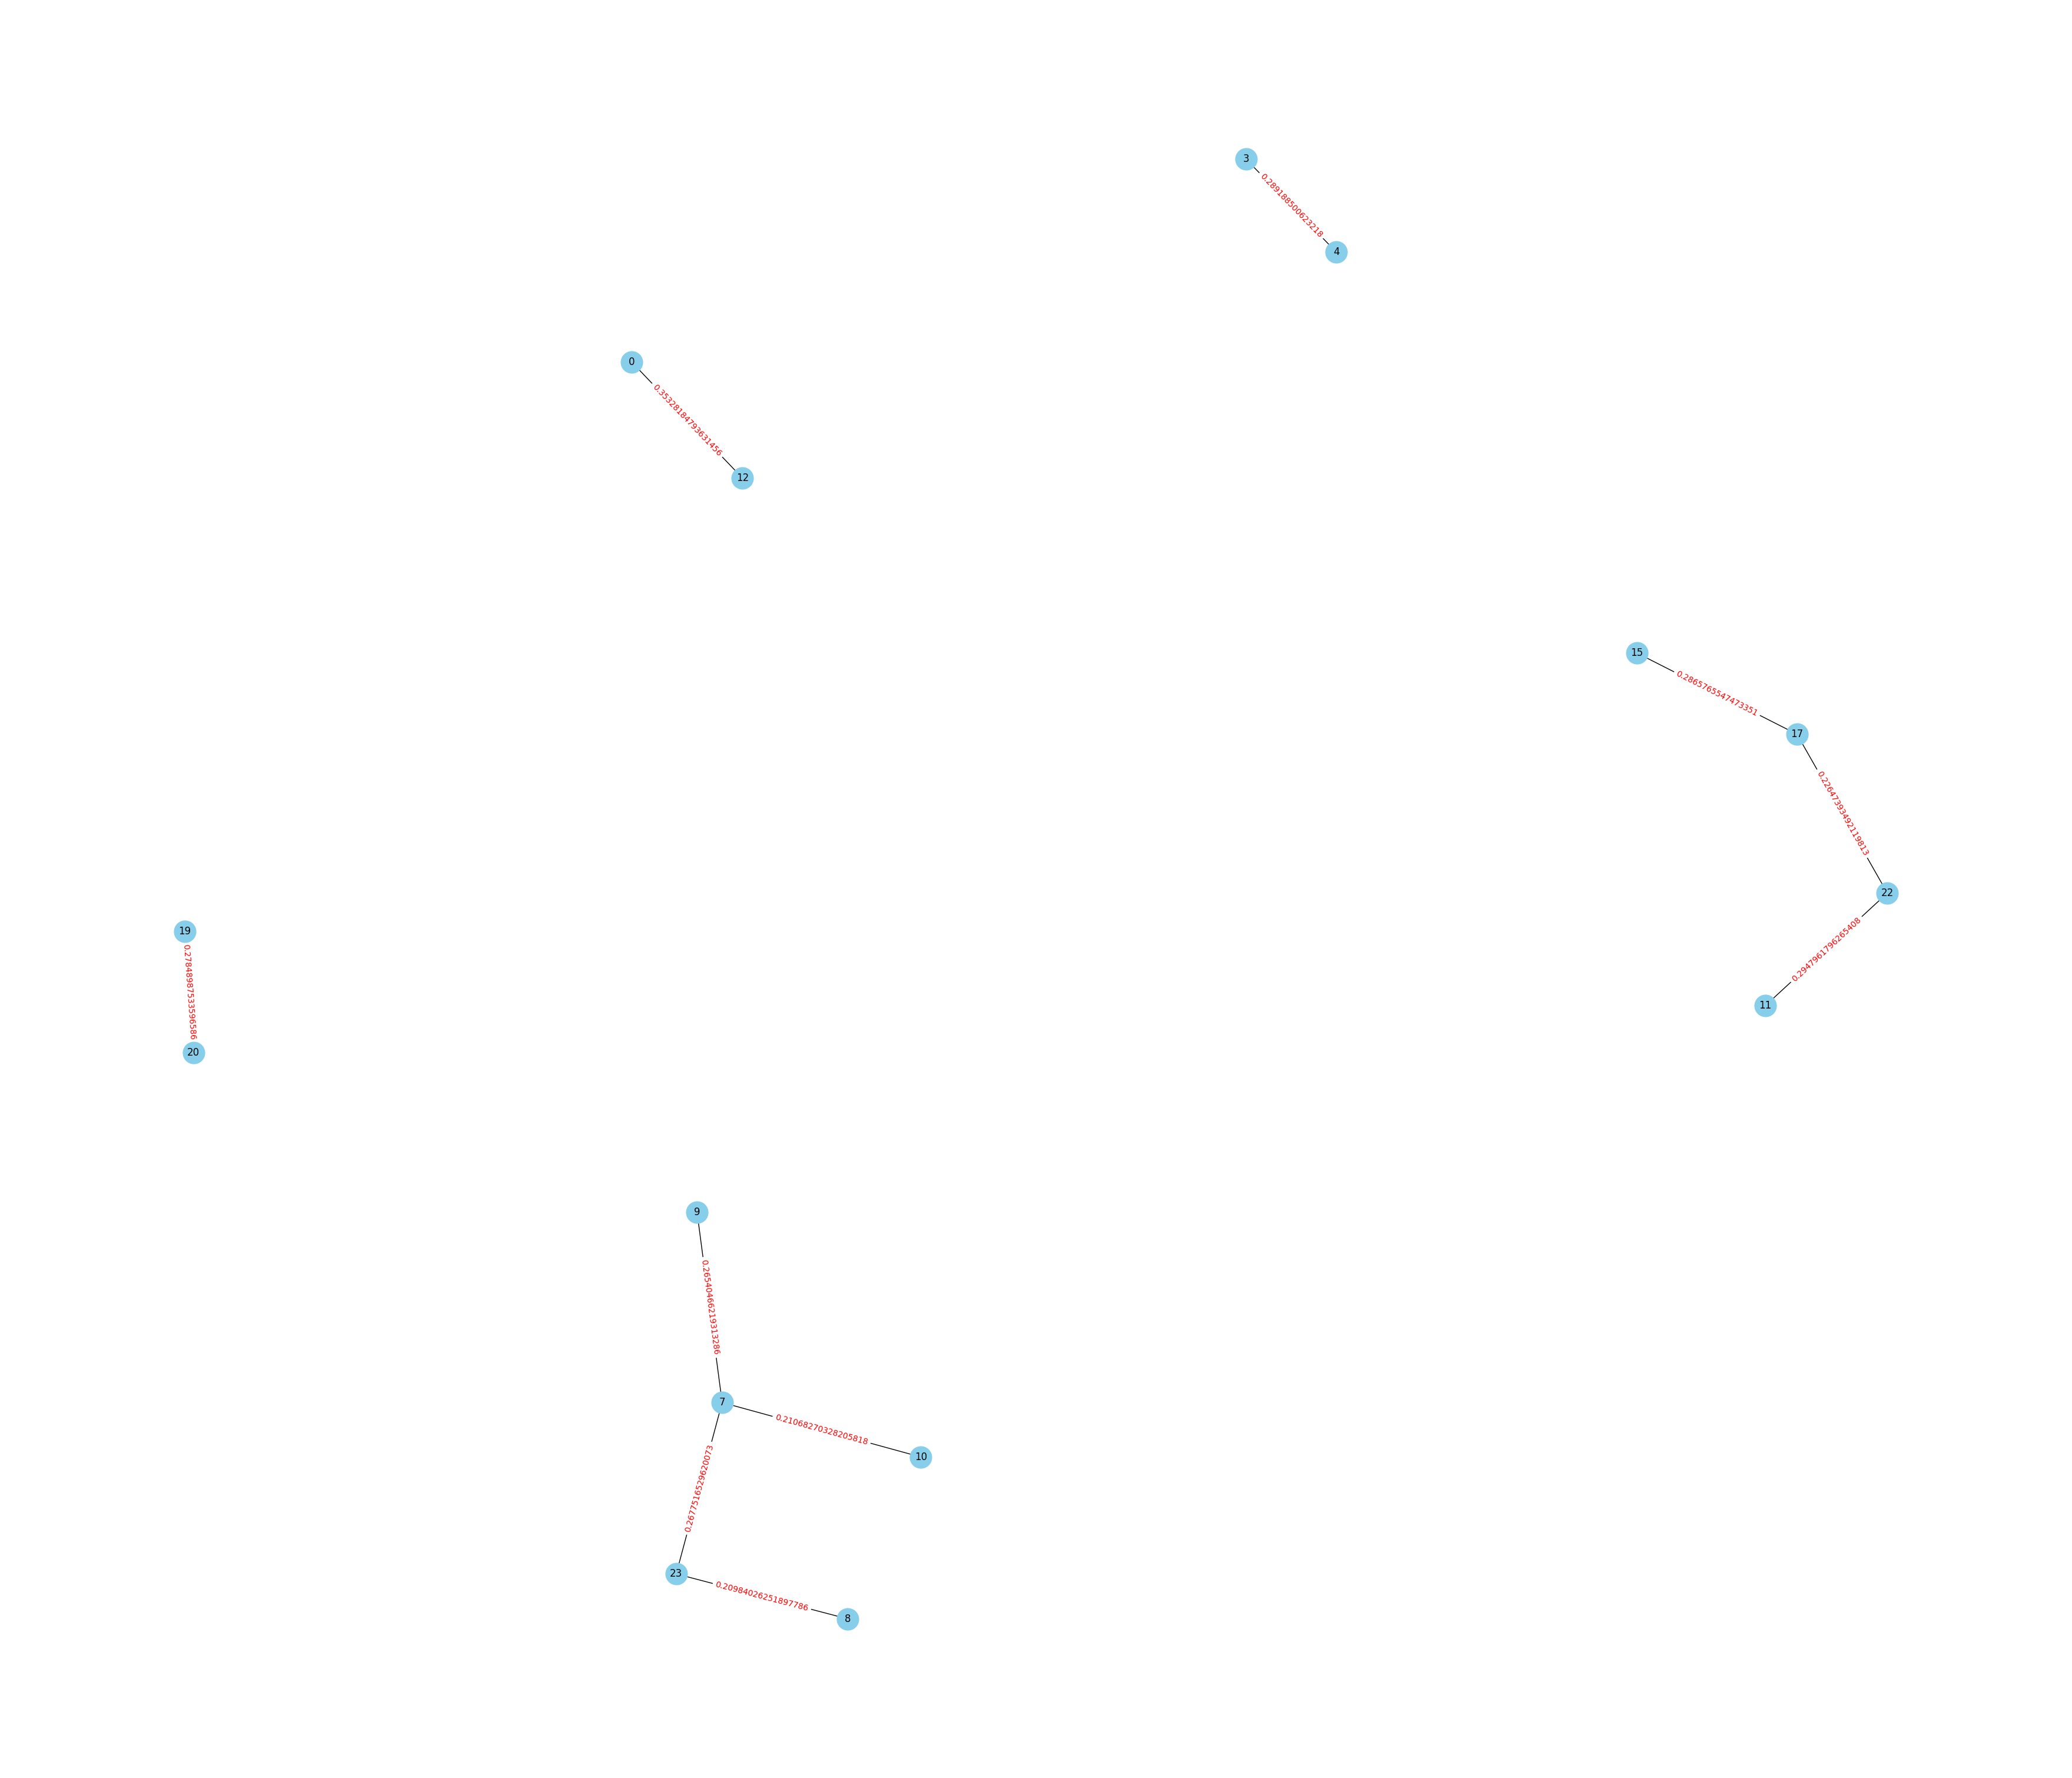

In [177]:
plot_graph(G)

## Ringkasan Semua Data

In [178]:
combined_df["Summary"] = combined_df.apply(lambda row : summarization(row['Tokenizing'], index=row.name+1, k=7, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.5785714285714286, 1: 0.43783783783783786, 7: 0.5785714285714286, 12: 0.3951219512195122, 13: 0.43783783783783786, 15: 0.5586206896551724, 17: 0.4909090909090909, 18: 0.4628571428571428, 21: 0.47647058823529415, 23: 0.54, 9: 0.4263157894736842, 3: 0.5586206896551724, 4: 0.43783783783783786, 8: 0.45, 10: 0.47647058823529415, 22: 0.45, 5: 0.3521739130434783, 11: 0.30566037735849055, 16: 0.3306122448979592, 19: 0.05, 20: 0.05}
Nilai Closeness Centrality Dokumen Ke - 2 : {0: 0.058823529411764705, 16: 0.058823529411764705, 2: 0.4901960784313726, 3: 0.4411764705882353, 5: 0.41360294117647056, 12: 0.4726890756302521, 13: 0.40106951871657753, 18: 0.32281205164992827, 9: 0.3393665158371041, 11: 0.348297213622291, 4: 0.2281947261663286, 6: 0.30080213903743314, 10: 0.4563894523326572, 7: 0.40106951871657753, 8: 0.38927335640138405, 15: 0.3393665158371041, 19: 0.41360294117647056, 17: 0.32281205164992827}
Nilai Closeness Centrality Dokumen Ke - 3 : 

## Memanggil Data Hasil Ringkasan

In [179]:
new_df = combined_df[["Summary", "Category"]]
new_df

,Summary,Category
0,gejala dan permasalahan geografi di setiap dae...,Edu
1,ia berhasil meraih juara dalam ajang indonesia...,Edu
2,ilmuwan telah memanfaatkan printing 3d untuk m...,Edu
3,"selama penggalian di abusir, antara giza dan s...",Edu
4,berikut adalah hal yang harus dilakukan saat k...,Edu
...,...,...
1718,sama seperti beberapa pemain sepak bola top la...,Sport
1719,marc marquez diyakini akan menyeberang ke gres...,Sport
1720,"gairah, antusias, dan semangat pemain untuk ti...",Sport
1721,kegiatan ini mengajak para ducati enthusiast u...,Sport


In [180]:
new_df.to_csv('Data Berita Hasil Ringkasan.csv')

## Modeling Ringkasan

In [181]:
combined_df["Summary"][0]

'gejala dan permasalahan geografi di setiap daerah berbedabeda. konsep diferensiasi area mengemukakan bahwa fenomena yang ada di muka bumi memiliki perbedaan dan ciri khas masingmasing dikutip dari buku explore geografi jilid 1 untuk smama kelas x karya dra sri wiyanti, mpd dkk., konsep diferensiasi area berhubungan dengan perbedaan fenomena yang terjadi di setiap wilayah. berdasarkan penjelasan di atas, berikut beberapa contoh konsep diferensiasi area dalam ruang lingkup geografi 1. jenis ikan yang dibudidayakan di air tawar berbeda dengan jenis ikan yang ada di air payau. perbedaan antar wilayah tersebut, dalam ilmu geografi dikaji dalam salah satu konsep dasar yaitu konsep diferensiasi area. itulah penjelasan tentang konsep diferensiasi area yang menekankan adanya perbedaan karakteristik di setiap wilayah. 3. jenis tanaman yang dibudidayakan di dataran tinggi akan berbeda dengan jenis di dataran rendah, seperti teh yang cocok di dataran tinggi dan jagung di dataran rendah. 7. kondis

In [182]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(combined_df["Summary"]).toarray()
y = combined_df["Category"]

In [183]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [184]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9632495164410058


In [185]:
report = classification_report(y_test_summary, y_pred_gnb_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

         Edu       0.96      0.97      0.96       267
       Sport       0.97      0.95      0.96       250

    accuracy                           0.96       517
   macro avg       0.96      0.96      0.96       517
weighted avg       0.96      0.96      0.96       517



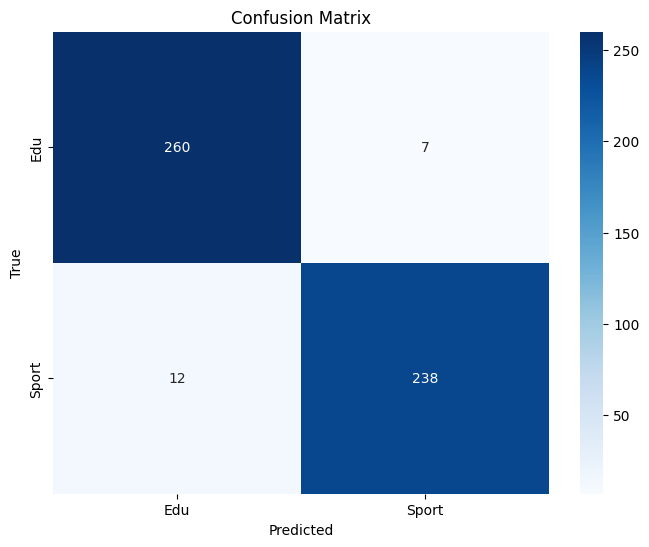

In [186]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_summary.classes_, yticklabels=gnb_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_gnb_summary)
plot_confusion_matrix(cm)

## Prediksi Data

In [187]:
new_data = ['Gejala dan permasalahan geografi di setiap daerah berbeda-beda. Masing-masing daerah memiliki faktor dan ciri khasnya masing-masing. Ada satu wilayah yang cocok ditanami vegetasi tertentu dan tidak bisa ditanami vegetasi lainnya. Perbedaan antar wilayah tersebut, dalam ilmu geografi dikaji dalam salah satu konsep dasar yaitu konsep diferensiasi area. Terdapat 10 konsep dasar dalam ilmu geografi di antaranya lokasi, jarak, morfologi, keterjangkauan, pola, aglomerasi, nilai kegunaan, interdependensi, keterkaitan ruang, dan diferensiasi area. SCROLL TO CONTINUE WITH CONTENT Pada kesempatan kali ini, mari kita membahas tentang konsep diferensiasi area beserta dengan contohnya. Jadi, yuk simak artikel ini sampai akhir. Konsep diferensiasi area mengemukakan bahwa fenomena yang ada di muka bumi memiliki perbedaan dan ciri khas masing-masing Dikutip dari buku Explore Geografi Jilid 1 untuk SMA/MA Kelas X karya Dra Sri Wiyanti, MPd dkk., konsep diferensiasi area berhubungan dengan perbedaan fenomena yang terjadi di setiap wilayah. Pengertian konsep diferensiasi area juga merujuk pada keunikan karakteristik suatu wilayah jika dibandingkan dengan wilayah lainnya. Mengutip dari e-Modul Pembelajaran SMA Geografi Kelas X karya Fitri Sekar Lestari, diferensiasi area adalah konsep yang membandingkan dua wilayah untuk menunjukkan karakteristik khasnya masing-masing. Dengan demikian, konsep diferensiasi area mempertegas bahwa antara satu tempat dengan tempat lainnya memiliki perbedaan. Baik kondisi secara fisik, sumber daya alam, hingga sumber daya manusianya. Hal ini karena berbagai gejala dan permasalahan geografis tersebar dalam ruang yang memiliki karakteristik yang berbeda-beda. Konsep ini mencakup pemahaman mendalam terhadap faktor-faktor geografis, sosial, dan ekonomi yang memberikan ciri khas dan identitas unik kepada suatu daerah. Dengan menganalisis perbedaan ini, ahli geografi dapat mengeksplorasi dinamika spasial dan temporal serta mengidentifikasi pola-pola yang membentuk keberagaman wilayah. Berdasarkan penjelasan di atas, berikut beberapa contoh konsep diferensiasi area dalam ruang lingkup geografi: 1. Jenis ikan yang dibudidayakan di air tawar berbeda dengan jenis ikan yang ada di air payau. 2. Permasalahan-permasalahan perkotaan yang sejenis dengan kota lain akan memerlukan alternatif pemecahan masalah yang berbeda sesuai dengan karakteristik keruangannya. 3. Jenis tanaman yang dibudidayakan di dataran tinggi akan berbeda dengan jenis di dataran rendah, seperti teh yang cocok di dataran tinggi dan jagung di dataran rendah. 4. Komoditas utama yang dihasilkan oleh masyarakat pedesaan adalah hasil pertanian, sedangkan yang dihasilkan di daerah perkotaan adalah barang industri 5. Masyarakat di daerah pegunungan cenderung menggunakan pakaian yang tebal, berbeda dengan masyarakat yang tinggal di pesisir pantai yang lebih sering menggunakan pakaian tipis. 6. Meskipun sama-sama wilayah karst, tetapi bentuk kenampakan lahan tetap berbeda. Misalkan kawasan karst Gunung Sewu memiliki satuan bentuk lahan kerucut sedangkan di kawasan Raja Ampat memiliki satuan lahan menara karst. 7. Kondisi biosfer yang berbeda-beda seperti bioma gurun, tundra, taiga, sabana, atau hutan hujan tropis menyebabkan perbedaan flora dan fauna yang tinggal di bioma satu dengan lainnya. 8. Perbedaan topografi dan relief antar wilayah menimbulkan kenampakan alam yang berbeda-beda seperti pegunungan, lembah, atau dataran rendah sehingga menciptakan perbedaan distribusi sumber daya alam. Itulah penjelasan tentang konsep diferensiasi area yang menekankan adanya perbedaan karakteristik di setiap wilayah.	']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'gejala dan permasalahan geografi di setiap daerah berbeda-beda. konsep diferensiasi area mengemukakan bahwa fenomena yang ada di muka bumi memiliki perbedaan dan ciri khas masing-masing dikutip dari buku explore geografi jilid 1 untuk sma/ma kelas x karya dra sri wiyanti, mpd dkk., konsep diferensiasi area berhubungan dengan perbedaan fenomena yang terjadi di setiap wilayah. berdasarkan penjelasan di atas, berikut beberapa contoh konsep diferensiasi area dalam ruang lingkup geografi: 1. jenis ikan yang dibudidayakan di air tawar berbeda dengan jenis ikan yang ada di air payau. itulah penjelasan tentang konsep diferensiasi area yang menekankan adanya perbedaan karakteristik di setiap wilayah. perbedaan antar wilayah tersebut, dalam ilmu geografi dikaji dalam salah satu konsep dasar yaitu konsep diferensiasi area.'

In [188]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

In [189]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

'Edu'

In [190]:
joblib.dump(gnb_summary, 'modelNB.pkl')

['modelNB.pkl']

In [ ]:
svm_summary = SVC()

# Melatih model menggunakan data latih
svm_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_svm_summary = svm_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_svm_summary)
print(f'Akurasi: {accuracy}')

In [ ]:
report = classification_report(y_test_summary, y_pred_svm_summary)
print(f'Report Klasifikasi:\n{report}')

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_summary.classes_, yticklabels=svm_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_svm_summary)
plot_confusion_matrix(cm)

In [ ]:
new_data = ['Menteri Perdagangan Zulkifli Hasan atau Zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. Zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.Adapun pembayaran utang rafaksi tersebut dilakukan oleh Badan Pengelola Dana Perkebunan Kelapa Sawit (BPDPKS). Namun, pembayaran itu harus atas rekomendasi Kemendag. Dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini BPDPKS belum melakukan pembayaran dikarenakan Kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh PT Sucofindo kepada BPDKS, kata Zulhas dalam rapat dengan Kementerian Perdagangan dengan Komisi VI DPR RI, Senin (27/11/2023). Baca artikel detikfinance, Di Depan DPR Zulhas Buka-bukaan soal Utang Pemerintah ke Pengusaha Minyak Goreng']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

In [ ]:
pred_svm_summary = svm_summary.predict(tfidf_Xnew_summary)
pred_svm_summary[0]

In [ ]:
joblib.dump(svm_summary, 'modelSVM.pkl')

In [ ]:
joblib.dump(vectorizer_summary, 'vectorizer.pkl')